In [1]:
import pandas as pd

df = pd.read_csv('./salary.csv')
df

C:\Users\ansh2\AppData\Local\Temp\ipykernel_26088\3804382963.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,masters,1
3,google,business manager,bachelors,0
4,google,computer programmer,masters,0
5,abc pharma,computer programmer,bachelors,1
6,abc pharma,computer programmer,bachelors,1
7,abc pharma,computer programmer,masters,0
8,abc pharma,sales executive,bachelors,1
9,facebook,sales executive,masters,0


In [2]:
input = df.drop('salary_more_than_100k', axis = 'columns')
target = df['salary_more_than_100k']

In [3]:
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,masters
3,google,business manager,bachelors
4,google,computer programmer,masters
5,abc pharma,computer programmer,bachelors
6,abc pharma,computer programmer,bachelors
7,abc pharma,computer programmer,masters
8,abc pharma,sales executive,bachelors
9,facebook,sales executive,masters


In [4]:
target

0     0
1     0
2     1
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    0
Name: salary_more_than_100k, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

le_c = LabelEncoder()
le_j = LabelEncoder()
le_d = LabelEncoder()

In [8]:
input['company_enc'] = le_c.fit_transform(input['company'])
input['job_enc'] = le_j.fit_transform(input['job'])
input['degree_enc'] = le_d.fit_transform(input['degree'])

In [9]:
input

,company,job,degree,company_enc,job_enc,degree_enc
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,masters,2,0,1
3,google,business manager,bachelors,2,0,0
4,google,computer programmer,masters,2,1,1
5,abc pharma,computer programmer,bachelors,0,1,0
6,abc pharma,computer programmer,bachelors,0,1,0
7,abc pharma,computer programmer,masters,0,1,1
8,abc pharma,sales executive,bachelors,0,2,0
9,facebook,sales executive,masters,1,2,1


In [10]:
inputs = input.drop(['company', 'job', 'degree'], axis = 1)

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [13]:
model.fit(inputs, target)

DecisionTreeClassifier()

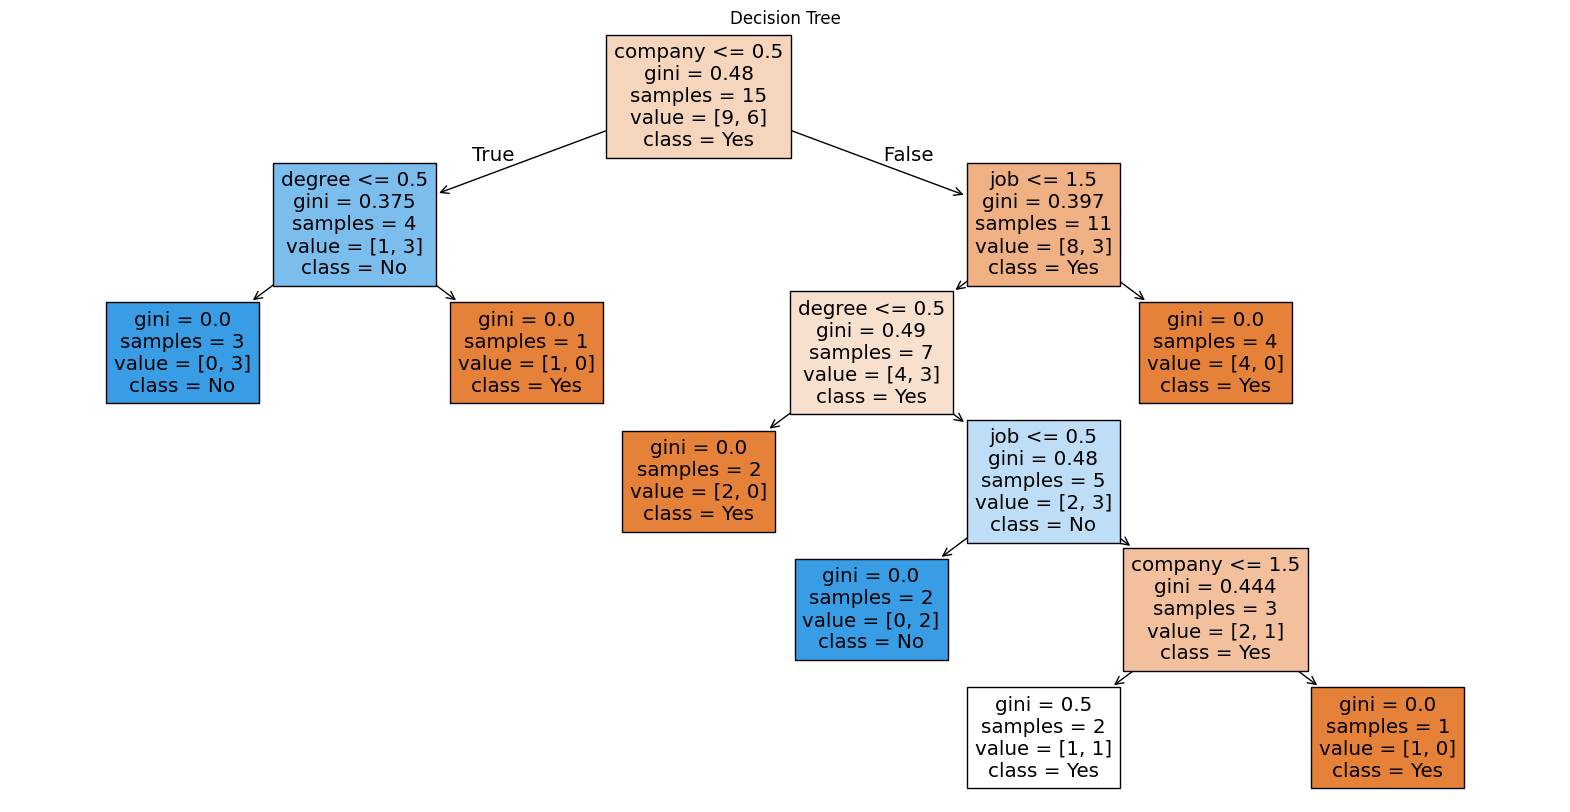

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names = input.columns, class_names=['Yes', 'No'], filled = True)
plt.title('Decision Tree')
plt.show()